In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols



In [2]:
df = pd.read_csv('bert_pares.csv')

In [63]:
df.head(5)

,days,sales,pares_kawali,pares_flowers
0,1,9524.0,1008.0,609.0
1,2,19716.0,1041.0,529.0
2,3,6354.0,1625.0,281.0
3,4,18706.0,1143.0,1591.0
4,5,11462.0,1875.0,1629.0


In [4]:
df.columns

Index(['days', 'sales', 'pares_kawali', 'pares_flowers'], dtype='object')

In [65]:
df.dtypes

,0
days,int64
sales,float64
pares_kawali,float64
pares_flowers,float64


In [64]:
df.shape

(30, 4)

In [66]:
df.isnull().sum()

,0
days,0
sales,0
pares_kawali,0
pares_flowers,0


In [56]:
df['sales'].fillna(df['sales'].mean(), inplace=True)
df['pares_kawali'].fillna(df['pares_kawali'].mean(), inplace=True)
df['pares_flowers'].fillna(df['pares_flowers'].mean(), inplace=True)

<ipython-input-56-f8a508513e8e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sales'].fillna(df['sales'].mean(), inplace=True)
<ipython-input-56-f8a508513e8e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [18]:
df.isnull().sum()

,0
days,0
sales,0
pares_kawali,0
pares_flowers,0


In [19]:
df.describe()

,days,sales,pares_kawali,pares_flowers
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,13193.037037,1201.777778,1072.034483
std,8.803408,3981.672145,509.811347,464.005535
min,1.000000,5124.000000,206.000000,206.000000
25%,8.250000,10662.500000,853.500000,741.250000
50%,15.500000,13193.037037,1201.777778,1049.017241
75%,22.750000,16333.000000,1599.750000,1503.500000
max,30.000000,19716.000000,1949.000000,1895.000000


In [20]:
df.corr()

,days,sales,pares_kawali,pares_flowers
days,1.000000,0.014172,0.200862,0.105899
sales,0.014172,1.000000,-0.151917,0.137831
pares_kawali,0.200862,-0.151917,1.000000,-0.003028
pares_flowers,0.105899,0.137831,-0.003028,1.000000


<Axes: xlabel='pares_flowers', ylabel='sales'>

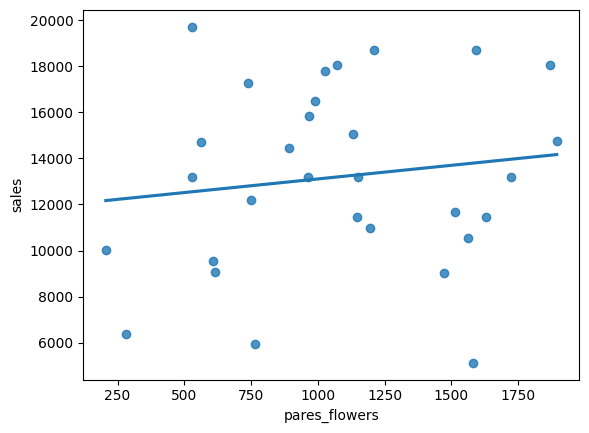

In [57]:
sns.regplot(x='pares_flowers', y='sales', data=df, ci=None)

In [58]:
#project the sales for the 32nd day using linear regression
#model: sales = intercept + slope * x

In [59]:
model_formula = 'sales ~ pares_flowers'
model = ols(model_formula, data=df).fit()

In [60]:
intercept = model.params['Intercept']
slope = model.params['pares_flowers']
print(f'The intercept is {intercept}')
print(f'The slope is {slope}')

The intercept is 11925.103067491695
The slope is 1.1827361805402203


In [61]:
pares_flowers_day32 = df['pares_flowers'].mean()

In [62]:
projected_sales_day32 = intercept + slope * pares_flowers_day32
print(f'The projected sales for the 32nd day is {projected_sales_day32}')

The projected sales for the 32nd day is 13193.037037037036
